# Final Implementation

In [1]:
train_dir = 'train'
test_dir = 'test'

In [2]:
from __future__ import absolute_import, division, print_function

import os

import tensorflow as tf
from tensorflow import keras
print("TensorFlow version is ", tf.__version__)

import numpy as np

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns


from tensorflow.keras.callbacks import TensorBoard, EarlyStopping, ModelCheckpoint

TensorFlow version is  1.13.1


In [3]:
train_dir = train_dir
validation_dir = test_dir

image_size = 224 # All images will be resized to 224x224
batch_size = 32

# Rescale all images by 1./255 and apply image augmentation
train_datagen = keras.preprocessing.image.ImageDataGenerator(rescale=1./255,
                                                              horizontal_flip=True,
                                                              width_shift_range = 0.2,
                                                              height_shift_range = 0.2,
                                                              rotation_range = 40,
                                                              shear_range = 0.2,
                                                              zoom_range = 0.2,
                                                              fill_mode='nearest')

validation_datagen = keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 32 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
                train_dir,  # Source directory for the training images
                target_size=(image_size, image_size),  
                batch_size=batch_size,
                # Since we use categorical_crossentropy loss, we need categorical labels
                class_mode='categorical')

# Flow validation images in batches of 32 using test_datagen generator
validation_generator = validation_datagen.flow_from_directory(
                validation_dir, # Source directory for the validation images
                target_size=(image_size, image_size),
                batch_size=batch_size,
                class_mode='categorical')

Found 7535 images belonging to 54 classes.
Found 736 images belonging to 55 classes.


In [4]:
num_classes = 54 

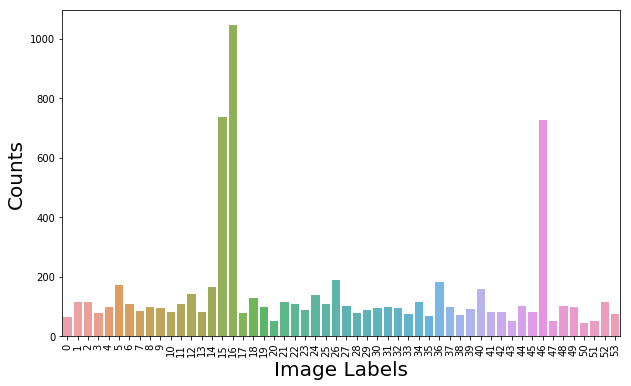

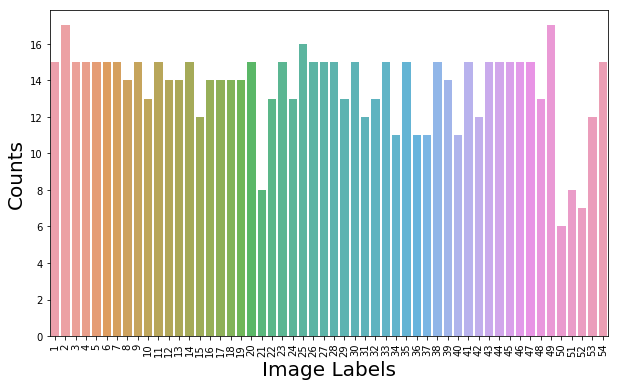

In [5]:
nb_train_samples = len(train_generator.classes)
nb_validation_samples = len(validation_generator.classes)

import pandas as pd
training_data = pd.DataFrame(train_generator.classes, columns=['classes'])
testing_data = pd.DataFrame(validation_generator.classes, columns=['classes'])

def create_stack_bar_data(col, df):
    aggregated = df[col].value_counts().sort_index()
    x_values = aggregated.index.tolist()
    y_values = aggregated.values.tolist()
    return x_values, y_values

x1, y1 = create_stack_bar_data('classes', training_data)

plt.figure(figsize = (10,6))
sns.barplot(x1, y1, alpha = 0.9)
plt.xticks(rotation = 'vertical')
plt.xlabel('Image Labels', fontsize =20)
plt.ylabel('Counts', fontsize = 20)
plt.show();


x1, y1 = create_stack_bar_data('classes', testing_data)

plt.figure(figsize = (10,6))
sns.barplot(x1, y1, alpha = 0.9)
plt.xticks(rotation = 'vertical')
plt.xlabel('Image Labels', fontsize =20)
plt.ylabel('Counts', fontsize = 20)
plt.show();

In [6]:
import os

plant_classes = os.listdir(train_dir)
plant_classes.sort()
print("Number of Categories:", len(plant_classes))
lst = []
for i in range (0,54):
    lst.append(i)

class_dict = dict( zip(lst, plant_classes))
print(class_dict)

Number of Categories: 54
{0: 'Alfalfa', 1: 'Asparagus', 2: 'Blue Vervain', 3: 'Bull Thistle', 4: 'Cattail', 5: 'Chickweed', 6: 'Chicory', 7: 'Cleavers', 8: 'Coltsfoot', 9: 'Common Sow Thistle', 10: 'Common Yarrow', 11: 'Coneflower', 12: 'Creeping Charlie', 13: 'Crimson Clover', 14: 'Curly Dock', 15: 'Daisy Fleabane', 16: 'Dandellion', 17: 'Downy Yellow Violet', 18: 'Elderberry', 19: 'Evening Primrose', 20: 'Fern Leaf Yarrow', 21: 'Field Pennycress', 22: 'Fireweed', 23: 'Forget Me Not', 24: 'Garlic Mustard', 25: 'Harebell', 26: 'Henbit', 27: 'Herb Robert', 28: 'Joe Pye Weed', 29: 'Knapweed', 30: 'Mayapple', 31: 'Meadowsweet', 32: 'Milk Thistle', 33: 'Mullein', 34: 'New England Aster', 35: 'Partridgeberry', 36: 'Peppergrass', 37: 'Pickerelweed', 38: 'Pineapple Weed', 39: 'Prickly Pear Cactus', 40: 'Purple Deadnettle', 41: 'Queen Annes Lace', 42: 'Red Clover', 43: 'Sheep Sorrel', 44: 'Shepherds Purse', 45: 'Spring Beauty', 46: 'Sunflower', 47: 'Supplejack Vine', 48: 'Teasel', 49: 'Toothwo

In [7]:
"""" This callback writes a log for TensorBoard, which allows you to
     visualize dynamic graphs of your training and test metrics,
     as well as activation histograms for the different layers in your model."""

# Callback to save the tensorboard logs to visualize the model. 
tensorboard= TensorBoard(log_dir='Tensorboard',
                            histogram_freq=0, 
                            batch_size=32, 
                            write_graph=True, 
                            write_grads=True, 
                            write_images=True, 
                            embeddings_freq=0, 
                            embeddings_layer_names=None, 
                            embeddings_metadata=None,
                            embeddings_data=None)

In [8]:
# stop training as soon as the validaion loss does not change significantly. 
early_stopping = EarlyStopping(monitor='val_loss', 
                              patience=10, 
                              verbose=0, 
                              mode='auto', 
                              baseline=None)

In [9]:
checkpoint_path = 'weights.best.hdf5'
# Create checkpoint callback
checkpoint = ModelCheckpoint(checkpoint_path, 
                                              monitor='loss', 
                                              verbose=1, 
                                              save_best_only=True,
                                              save_weights_only=False,
                                              mode='min', #min for loss and max for accuracy
                                              period=1)

[2.2148736  1.21336554 1.2240091  1.78893637 1.40946502 0.80657247
 1.2801563  1.6416122  1.4535108  1.50039825 1.70167118 1.2920096
 0.97578348 1.72267947 0.84058456 0.18984631 0.13365617 1.76629161
 1.09871683 1.4535108  2.79074074 1.23484104 1.2801563  1.58564815
 1.01851852 1.30408446 0.7382912  1.39537037 1.76629161 1.58564815
 1.50039825 1.43852616 1.50039825 1.88563564 1.2240091  2.0222759
 0.77520576 1.4535108  1.9380144  1.51670692 0.88877094 1.70167118
 1.72267947 2.73602033 1.39537037 1.72267947 0.19246488 2.79074074
 1.38155482 1.40946502 3.1712963  2.79074074 1.2240091  1.88563564]


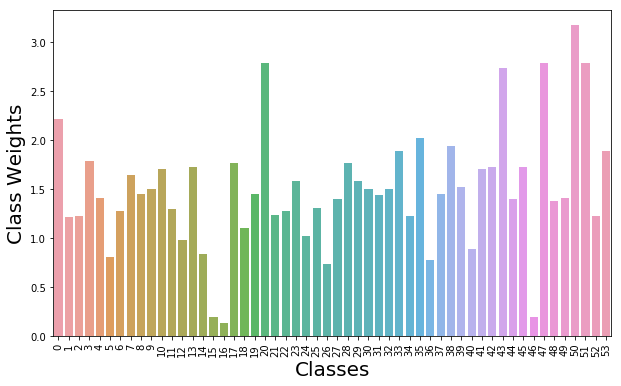

In [10]:
from sklearn.utils import class_weight
import numpy as np
import seaborn as sns
class_weights = class_weight.compute_class_weight(
               'balanced',
                np.unique(train_generator.classes), 
                train_generator.classes)
print(class_weights)

plt.figure(figsize = (10,6))
sns.barplot(np.unique(train_generator.classes), class_weights, alpha = 0.9)
plt.xticks(rotation = 'vertical')
plt.xlabel('Classes', fontsize =20)
plt.ylabel('Class Weights', fontsize = 20)
plt.show()

In [11]:
IMG_SHAPE = (image_size, image_size, 3)

# Create the base model from the pre-trained model Resnet 50
base_model = tf.keras.applications.ResNet50(input_shape=IMG_SHAPE,
                                               include_top=False, 
                                               weights='imagenet')

base_model.trainable = False

# Let's take a look at the base model architecture
base_model.summary()

Instructions for updating:
Colocations handled automatically by placer.


/home/ldeng/.local/lib/python3.6/site-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalizationV1) (None, 112, 112, 64) 256         conv1[0][0]                      
__________________________________________________________________________________________________
activation

In [12]:
num_classes = 54
rate = 0.20

model = tf.keras.Sequential([
  base_model, # Resnet 50
  keras.layers.GlobalAveragePooling2D(),
  keras.layers.Dropout(rate), # add drop out layer
  keras.layers.Dense(num_classes, activation='softmax')
])

len(model.trainable_variables)
# include the drop out layer if needed 

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


2

In [13]:
init_op =  tf.global_variables_initializer()     
with tf.Session() as sess:
    sess.run(init_op)

In [14]:
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
sess = tf.Session(config=config)

model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=0.0001), 
              loss='categorical_crossentropy', 
              metrics=['accuracy', 'top_k_categorical_accuracy'])

model.summary()

# tf.train.AdagradOptimizer
# tf.keras.optimizers.RMSprop(lr=0.0001)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Model)             (None, 7, 7, 2048)        23587712  
_________________________________________________________________
global_average_pooling2d (Gl (None, 2048)              0         
_________________________________________________________________
dropout (Dropout)            (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 54)                110646    
Total params: 23,698,358
Trainable params: 110,646
Non-trainable params: 23,587,712
_________________________________________________________________


In [15]:
output_path = tf.contrib.saved_model.save_keras_model(model, './SavedModels')


For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.


Consider using a TensorFlow optimizer from `tf.train`.
Instructions for updating:
Use tf.train.CheckpointManager to manage checkpoints rather than manually editing the Checkpoint proto.
Instructions for updating:
This function will only be available through the v1 compatibility library as tf.compat.v1.saved_model.utils.build_tensor_info or tf.compat.v1.saved_model.build_tensor_info.
INFO:tensorflow:Signatures INCLUDED in export for Classify: None
INFO:tensorflow:Signatures INCLUDED in export for Regress: None
INFO:tensorflow:Signatures INCLUDED in export for Predict: ['serving_default']
INFO:tensorflow:Signatures INCLUDED in export for Train: None
INFO:tensorflow:Signatures INCLUDED in export for Eval: None
INFO:tensorflow:No assets to save.
INFO:tensor

In [16]:
epochs = 50
steps_per_epoch = train_generator.n // batch_size
validation_steps = validation_generator.n // batch_size

history = model.fit_generator(train_generator, 
                              steps_per_epoch = steps_per_epoch,
                              epochs=epochs, 
                              workers=50,
                              class_weight= class_weights,
                              callbacks = [tensorboard, early_stopping, checkpoint],
                              validation_data=validation_generator, 
                              validation_steps=validation_steps)

# Save entire model to a HDF5 file
#model.save('my_new_model.h5')

Instructions for updating:
Use tf.cast instead.
Epoch 1/50
23/23 [==============================] - 39s 2s/step - loss: 4.4908 - acc: 0.0136 - top_k_categorical_accuracy: 0.0968

Epoch 00001: loss improved from inf to 3.42035, saving model to weights.best.hdf5
236/236 [==============================] - 456s 2s/step - loss: 3.4190 - acc: 0.1833 - top_k_categorical_accuracy: 0.4087 - val_loss: 4.4908 - val_acc: 0.0136 - val_top_k_categorical_accuracy: 0.0968
Epoch 2/50
23/23 [==============================] - 39s 2s/step - loss: 4.4389 - acc: 0.0272 - top_k_categorical_accuracy: 0.1379

Epoch 00002: loss improved from 3.42035 to 2.63074, saving model to weights.best.hdf5
236/236 [==============================] - 454s 2s/step - loss: 2.6312 - acc: 0.3318 - top_k_categorical_accuracy: 0.6114 - val_loss: 4.4389 - val_acc: 0.0272 - val_top_k_categorical_accuracy: 0.1379
Epoch 3/50
23/23 [==============================] - 38s 2s/step - loss: 3.5440 - acc: 0.0858 - top_k_categorical_accuracy:

23/23 [==============================] - 40s 2s/step - loss: 1.0390 - acc: 0.7112 - top_k_categorical_accuracy: 0.9320

Epoch 00020: loss improved from 1.02282 to 1.01288, saving model to weights.best.hdf5
236/236 [==============================] - 454s 2s/step - loss: 1.0123 - acc: 0.7238 - top_k_categorical_accuracy: 0.9148 - val_loss: 1.0390 - val_acc: 0.7112 - val_top_k_categorical_accuracy: 0.9320
Epoch 21/50
23/23 [==============================] - 38s 2s/step - loss: 1.0276 - acc: 0.7248 - top_k_categorical_accuracy: 0.9321

Epoch 00021: loss improved from 1.01288 to 0.97264, saving model to weights.best.hdf5
236/236 [==============================] - 454s 2s/step - loss: 0.9716 - acc: 0.7311 - top_k_categorical_accuracy: 0.9212 - val_loss: 1.0276 - val_acc: 0.7248 - val_top_k_categorical_accuracy: 0.9321
Epoch 22/50
23/23 [==============================] - 39s 2s/step - loss: 1.0316 - acc: 0.7275 - top_k_categorical_accuracy: 0.9278

Epoch 00022: loss did not improve from 0.972

Epoch 40/50
23/23 [==============================] - 38s 2s/step - loss: 0.9441 - acc: 0.7466 - top_k_categorical_accuracy: 0.9440

Epoch 00040: loss improved from 0.79731 to 0.79361, saving model to weights.best.hdf5
236/236 [==============================] - 454s 2s/step - loss: 0.7941 - acc: 0.7777 - top_k_categorical_accuracy: 0.9470 - val_loss: 0.9441 - val_acc: 0.7466 - val_top_k_categorical_accuracy: 0.9440
Epoch 41/50
23/23 [==============================] - 39s 2s/step - loss: 0.9357 - acc: 0.7452 - top_k_categorical_accuracy: 0.9441

Epoch 00041: loss improved from 0.79361 to 0.78673, saving model to weights.best.hdf5
236/236 [==============================] - 455s 2s/step - loss: 0.7882 - acc: 0.7813 - top_k_categorical_accuracy: 0.9426 - val_loss: 0.9357 - val_acc: 0.7452 - val_top_k_categorical_accuracy: 0.9441
Epoch 42/50
23/23 [==============================] - 38s 2s/step - loss: 0.9483 - acc: 0.7493 - top_k_categorical_accuracy: 0.9427

Epoch 00042: loss did not improv

In [17]:
# save model
tf.keras.models.save_model(
    model,
    'Resnet50',
    overwrite=True,
    include_optimizer=True
)

#output_path = tf.contrib.saved_model.save_keras_model(model, './tmp_dir')

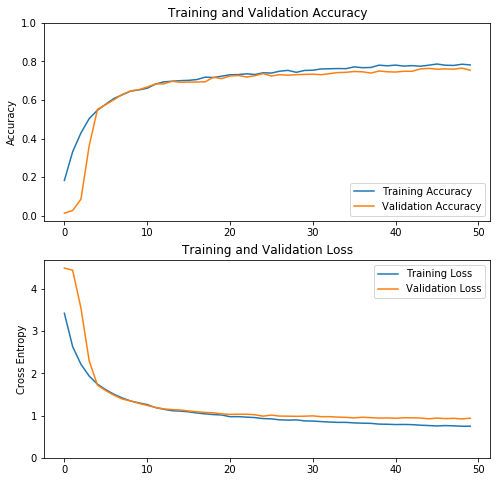

In [18]:
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,max(plt.ylim())])
plt.title('Training and Validation Loss')
plt.show()


In [19]:
base_model.trainable = True

# Fine Tuning

In [20]:
# Let's take a look to see how many layers are in the base model
print("Number of layers in the base model: ", len(base_model.layers))

# Fine tune from this layer onwards
fine_tune_at = 150 

# Freeze all the layers before the `fine_tune_at` layer
for layer in base_model.layers[:fine_tune_at]:
  layer.trainable =  False

Number of layers in the base model:  175


In [21]:
model.compile(loss='categorical_crossentropy',
              optimizer = tf.keras.optimizers.RMSprop(lr=2e-5),
              metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Model)             (None, 7, 7, 2048)        23587712  
_________________________________________________________________
global_average_pooling2d (Gl (None, 2048)              0         
_________________________________________________________________
dropout (Dropout)            (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 54)                110646    
Total params: 23,698,358
Trainable params: 11,149,366
Non-trainable params: 12,548,992
_________________________________________________________________


In [22]:
output_path = tf.contrib.saved_model.save_keras_model(model, './Finetuned')


Consider using a TensorFlow optimizer from `tf.train`.
INFO:tensorflow:Signatures INCLUDED in export for Classify: None
INFO:tensorflow:Signatures INCLUDED in export for Regress: None
INFO:tensorflow:Signatures INCLUDED in export for Predict: ['serving_default']
INFO:tensorflow:Signatures INCLUDED in export for Train: None
INFO:tensorflow:Signatures INCLUDED in export for Eval: None
INFO:tensorflow:No assets to save.
INFO:tensorflow:No assets to write.
INFO:tensorflow:SavedModel written to: ./Finetuned/1555626896/saved_model.pb


In [23]:
history_fine = model.fit_generator(train_generator, 
                                   steps_per_epoch = steps_per_epoch,
                                   epochs=50, 
                                   workers=4,
                                   validation_data=validation_generator, 
                                   callbacks = [tensorboard, early_stopping, checkpoint],
                                   validation_steps=validation_steps)

Epoch 1/50
23/23 [==============================] - 37s 2s/step - loss: 0.9623 - acc: 0.7520

Epoch 00001: loss improved from 0.74693 to 0.70511, saving model to weights.best.hdf5
236/236 [==============================] - 569s 2s/step - loss: 0.7069 - acc: 0.7956 - val_loss: 0.9623 - val_acc: 0.7520
Epoch 2/50
23/23 [==============================] - 37s 2s/step - loss: 0.9115 - acc: 0.7752

Epoch 00002: loss improved from 0.70511 to 0.62704, saving model to weights.best.hdf5
236/236 [==============================] - 565s 2s/step - loss: 0.6270 - acc: 0.8162 - val_loss: 0.9115 - val_acc: 0.7752
Epoch 3/50
23/23 [==============================] - 37s 2s/step - loss: 0.8936 - acc: 0.7916

Epoch 00003: loss improved from 0.62704 to 0.56154, saving model to weights.best.hdf5
236/236 [==============================] - 565s 2s/step - loss: 0.5627 - acc: 0.8344 - val_loss: 0.8936 - val_acc: 0.7916
Epoch 4/50
23/23 [==============================] - 38s 2s/step - loss: 0.8760 - acc: 0.7929



In [24]:
# save model
tf.keras.models.save_model(
    model,
    'FinetunedResnet50',
    overwrite=True,
    include_optimizer=True
)

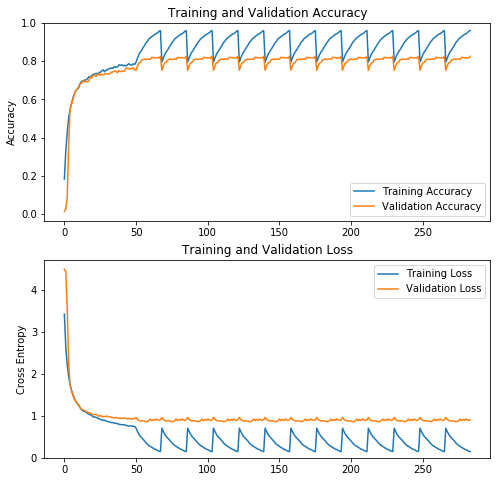

In [37]:
len(model.trainable_variables)

acc += history_fine.history['acc']
val_acc += history_fine.history['val_acc']

loss += history_fine.history['loss']
val_loss += history_fine.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,max(plt.ylim())])
plt.title('Training and Validation Loss')
plt.show()

# Reload the saved model

In [7]:
loaded_model = tf.contrib.saved_model.load_keras_model('Finetuned/1555626896')
loaded_model.summary()




For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Model)             (None, 7, 7, 2048)        23587712  
_________________________________________________________________
global_average_pooling2d (Gl (None, 2048)              0         
_________________________________________________________________
dropout (Dropout)            (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 54)          

In [8]:
model = tf.keras.models.load_model('FinetunedResnet50')

Instructions for updating:
Use tf.cast instead.


# Confusion Matrix

In [9]:
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Model

Found 736 images belonging to 54 classes.
[ 0 42 25 42 12 25 25 29  0 18 12 18 36  0  0  1  1  1  1  4 16  1 30  1
  1  1  1  1 46  1 42 16  3  2  2  2  2  2  2 26  2  2  2  2  2  2 24 48
  3  3  3  3  3  3  3  3  3  3  3  3  3  3  4  4  4  4  4  4  4  4  4  4
  4  4 16 16  4  5 15  5  5  5  5  5  5  5  5  5  5 15 15  5  6  6  6  6
  6 25  4  6  6  6  6  6  6  6  6  7  7  7  7  7 19  7  7  7  7  7 36  7
  7  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  9 16 16 12 16 16  9 16
 16  5  8  9 15 10 10 10 10 41 41 41 10 10 10 10 41 10 41 10 11 11 11 11
 11 11 11 11 11 11 11 11 11 11 12  2 12 51 26 40 12 12 12 12 12 25 12 15
 13 13 13 13 13 15 42 37 13 13 13 13 13 42 13 18 14 14 14 28 14 36 14 14
 14 14 14 15 15 15 15 15  9 15 15 15 15 15 15 15 15 16 16 16 16 48 16 16
 16 16 16 16 16 16 16 17 17 19 17 17 17 17 17 17 17 17 17 17 17 18 10 23
 18 18 18 18 24 18 18 18 18 18 18  7 19 19 19 19 19 19 19 19 19 19 19 19
 19 19 20 20 20 20 20 20 20 20 21 21 21 36 24 24 16 44 21 21 21 21 24 22
 22 22 22

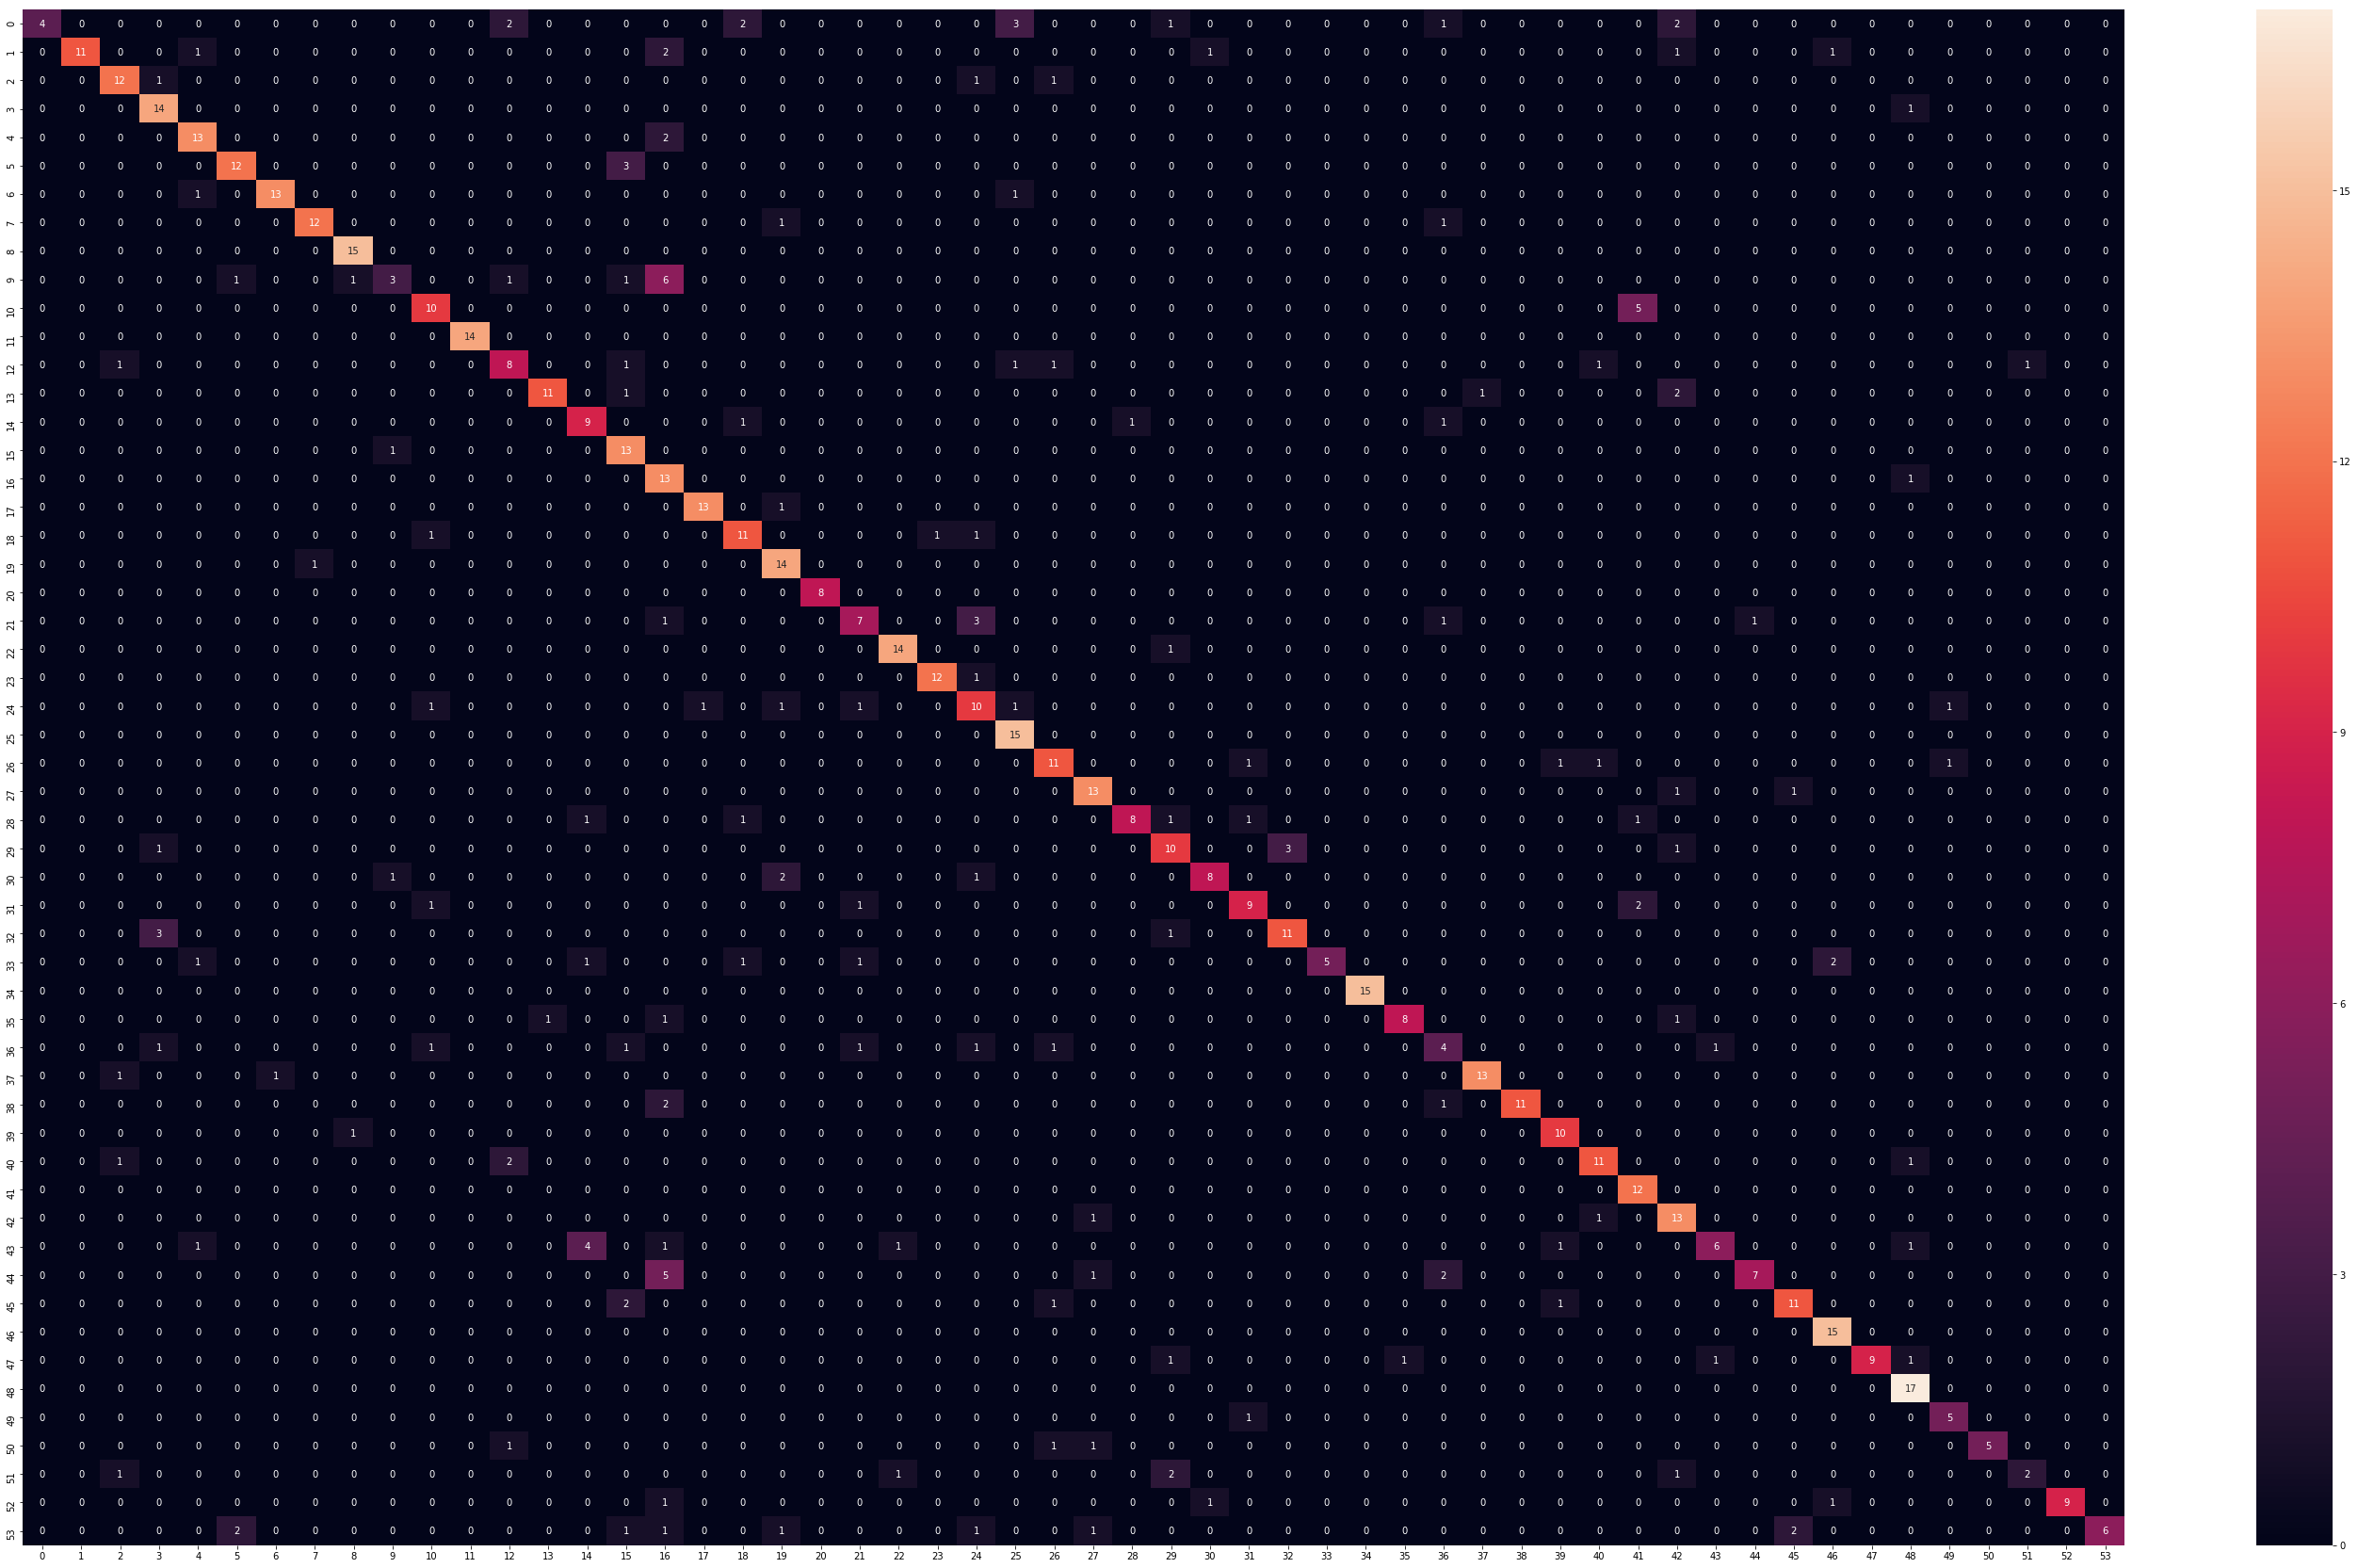

In [13]:
import numpy as np

import tensorflow as tf 

#loaded_model = keras.models.load_model('Resnet50')

# Flow validation images in batches of 32 using test_datagen generator
validation_generator = validation_datagen.flow_from_directory(
                'Test', # Source directory for the validation images
                target_size=(image_size, image_size),
                batch_size=batch_size,
                shuffle = False, 
                class_mode='categorical')

# Predict the values from the validation dataset
Y_pred = loaded_model.predict_generator(validation_generator, 23)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred, axis = 1)
 
print(Y_pred_classes)
# compute the confusion matrix
confusion_mtx = confusion_matrix(y_true = validation_generator.classes,y_pred = Y_pred_classes)


plt.figure(figsize = (50,30))
sns.heatmap(confusion_mtx, annot=True)

In [15]:
# Classification report
from sklearn.metrics import classification_report
print(classification_report(validation_generator.classes,
                                    Y_pred_classes,
                                    target_names = sorted(os.listdir(train_dir))))

                     precision    recall  f1-score   support

            Alfalfa       1.00      0.27      0.42        15
          Asparagus       1.00      0.65      0.79        17
       Blue Vervain       0.75      0.80      0.77        15
       Bull Thistle       0.70      0.93      0.80        15
            Cattail       0.76      0.87      0.81        15
          Chickweed       0.80      0.80      0.80        15
            Chicory       0.93      0.87      0.90        15
           Cleavers       0.92      0.86      0.89        14
          Coltsfoot       0.88      1.00      0.94        15
 Common Sow Thistle       0.60      0.23      0.33        13
      Common Yarrow       0.71      0.67      0.69        15
         Coneflower       1.00      1.00      1.00        14
   Creeping Charlie       0.57      0.57      0.57        14
     Crimson Clover       0.92      0.73      0.81        15
         Curly Dock       0.60      0.75      0.67        12
     Daisy Fleabane    

# Finetuned Model

Found 736 images belonging to 54 classes.
[ 0  0  0 42 12 25  0  0  0  0 12 18 36  0  0  1  1  1  1 52 16  1 39  1
  1  1  1  1 46  1 44 16  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2 48
  3  3  3  3  3  3  3  3  3  3  3  3  3  3  4  4  4  4  4  4  4  4  4  4
  4  4  4  4  4  5 15  5  5  5  5  5  5  5  5  5  5  5 45  5  6  6  6  6
  6  6 15  6  6  6  6  6  6  6  6  7  7  7  7  7  7  7  7  7  7  7  7  7
  7  8  8  8  8  8  8  8 15  8  8  8  8  8  8  8  9 16 16  9 16  9  9 16
 53  5  8 16 16 10 10 10 10 41 41 41 10 10 10 10 10 10 10 10 11 11 11 11
 11 11 11 11 11 11 11 11 11 11 12  2 12 51  2 12 12 12 12 12 12 25 12 12
 13 13 13 13 13 15 42 13 13 13 13 13 13 42 13 14 14 14 14 43 14 14 14 14
 14 14 14 15 15 15 15 15 15 15 15 15 15 15 15 15 15 16 16 16 16 16 16 16
 16 16 16 16 16 16 16 17 17 19 17 17 17 17 17 17 17 17 17 17 17 18 10 23
 18 18 18 18 24 18 18 18 18 18 18 48 19 19 19 19 19 19 19 19 19 19 19 19
 19 19 20 20 20 20 20 20 20 20 21 21 21 24 24 21  9 44 21 21 21 21 36 22
 22 22 22

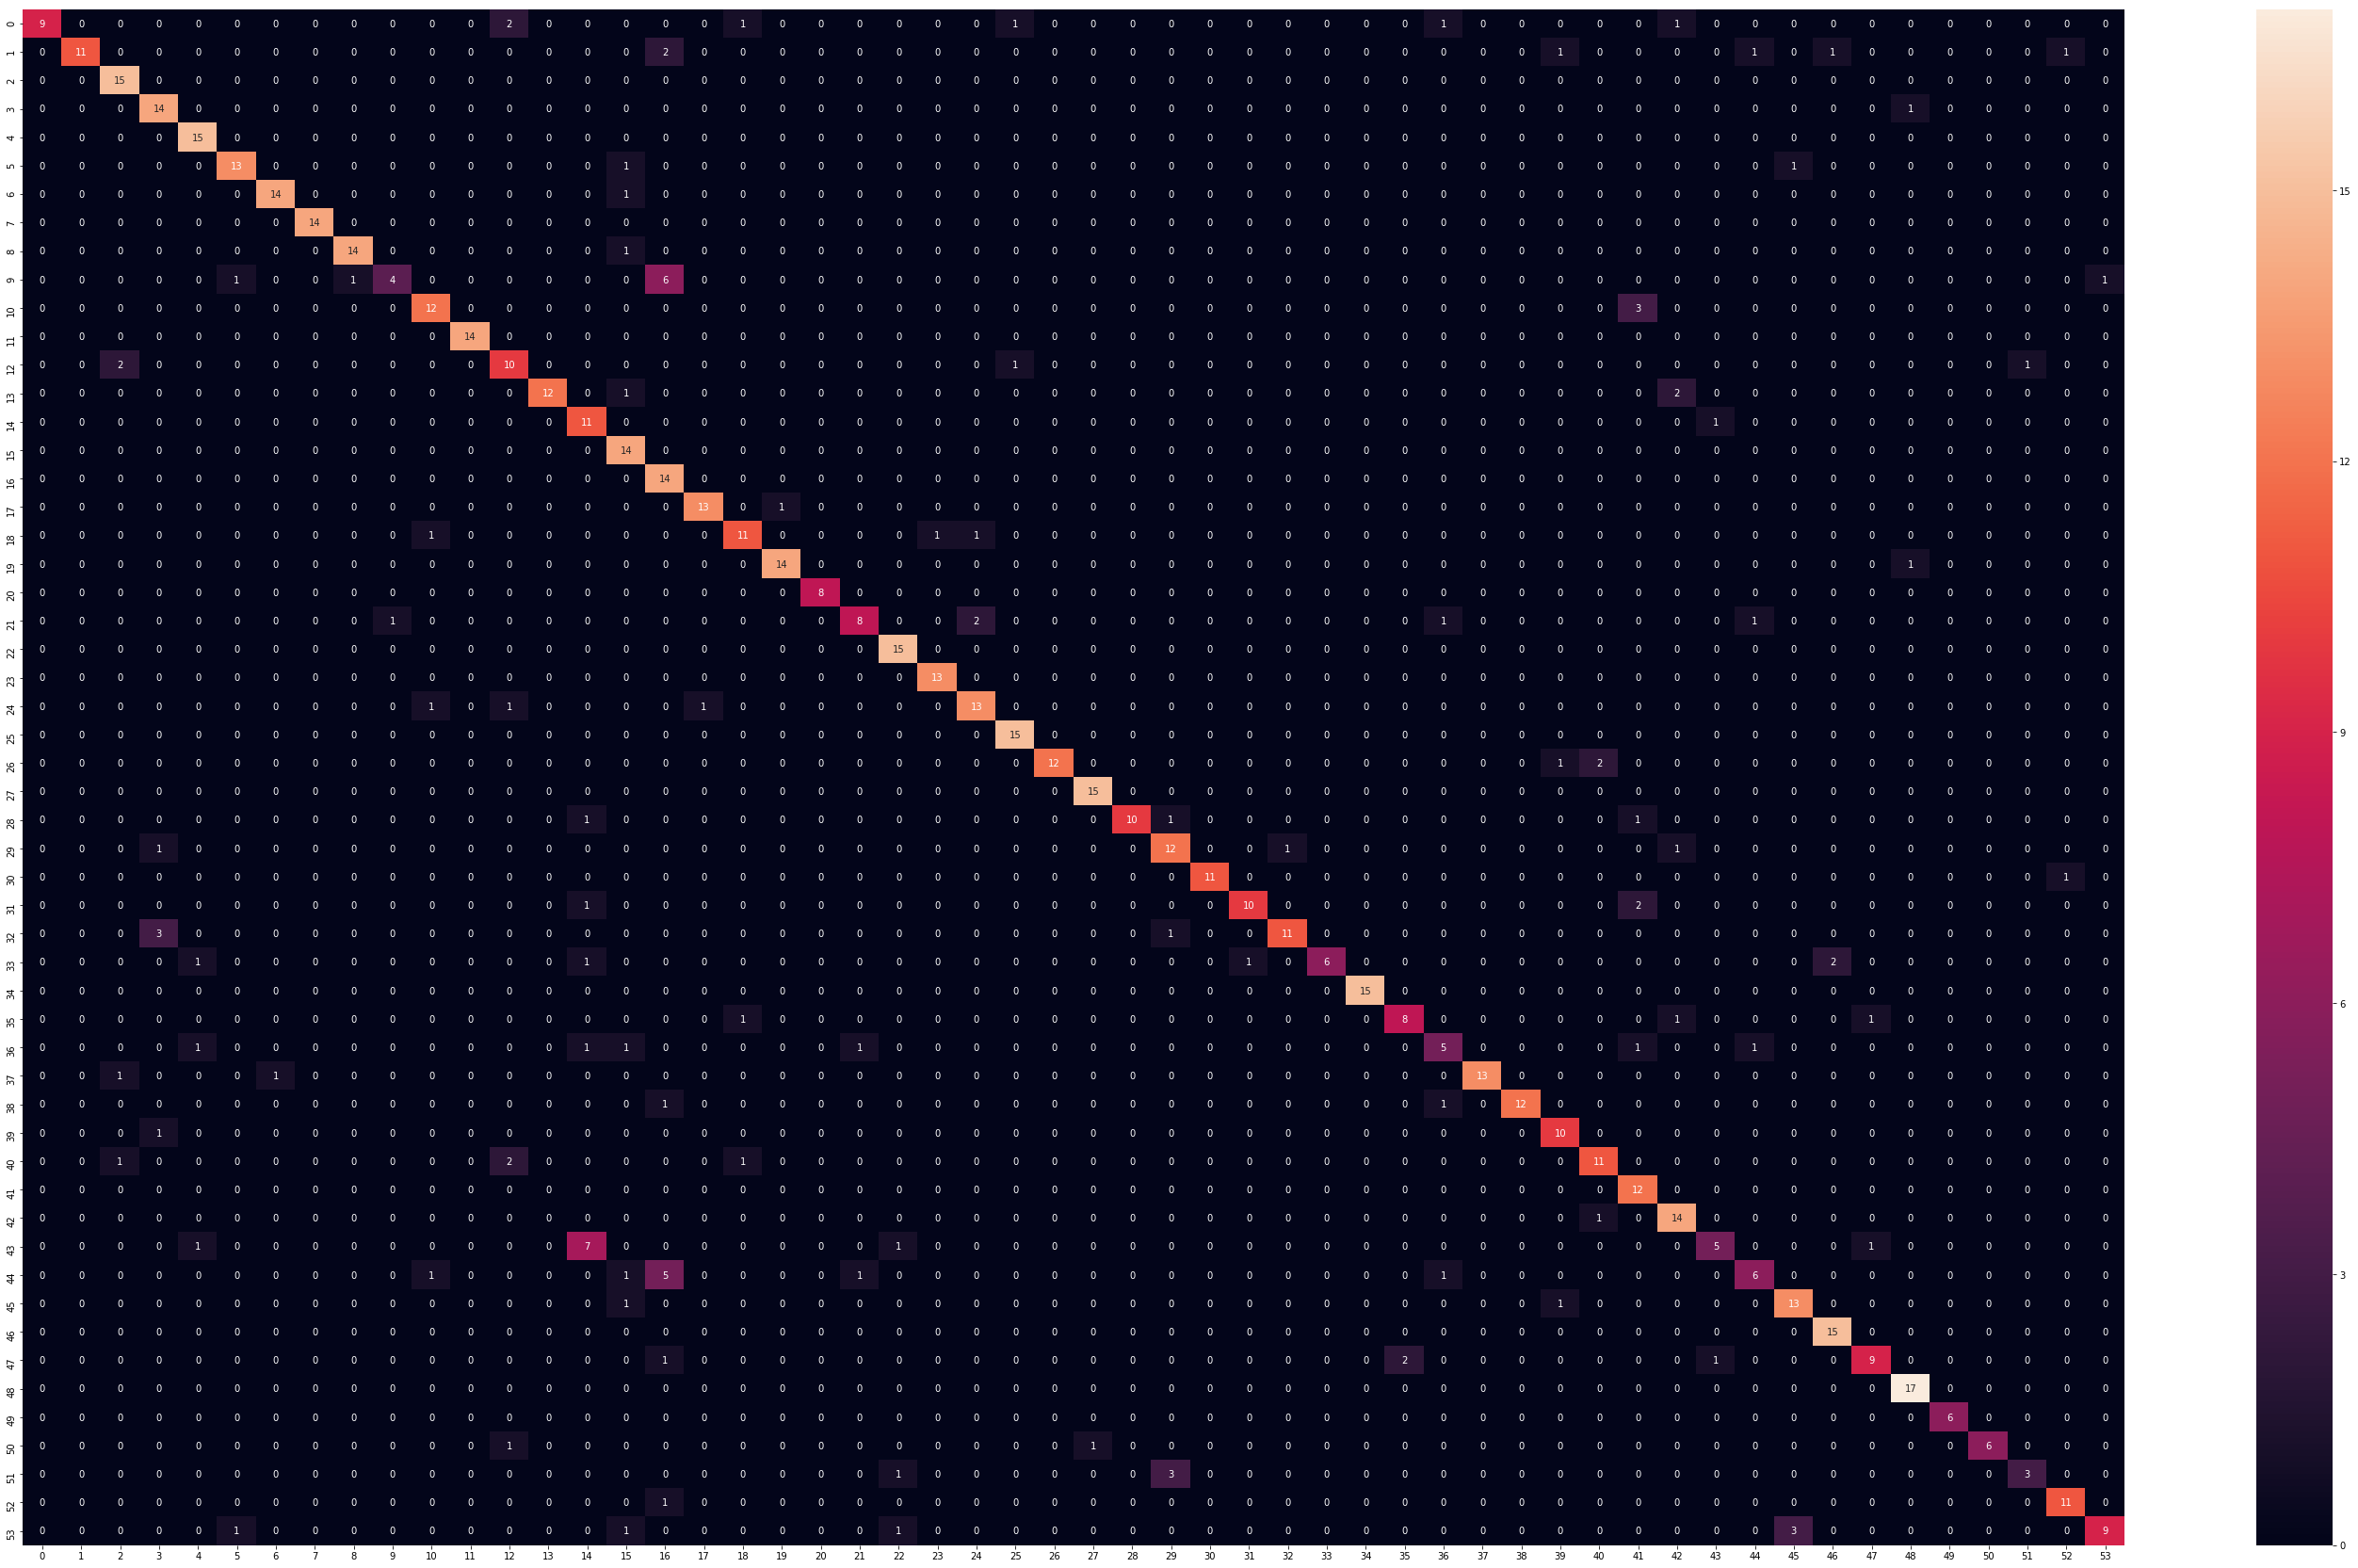

In [16]:
import numpy as np

import tensorflow as tf 

#model = keras.models.load_model('FinetunedResnet50')

# Flow validation images in batches of 32 using test_datagen generator
validation_generator = validation_datagen.flow_from_directory(
                'Test', # Source directory for the validation images
                target_size=(image_size, image_size),
                batch_size=batch_size,
                shuffle = False, 
                class_mode='categorical')
np.set_printoptions(threshold=np.inf)
# Predict the values from the validation dataset
Y_pred = model.predict_generator(validation_generator, 23)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred, axis = 1)

lst = []
for i in Y_pred_classes:
    lst.append(str(i)+ ':' + str(class_dict[int(i)]))
print(Y_pred_classes)
print(lst)

# compute the confusion matrix
confusion_mtx = confusion_matrix(y_true = validation_generator.classes,y_pred = Y_pred_classes)


plt.figure(figsize = (50,30))
sns.heatmap(confusion_mtx, annot=True)

In [17]:
# Classification report

from sklearn.metrics import classification_report
cr = classification_report(validation_generator.classes,
                                    Y_pred_classes,
                                    target_names = sorted(os.listdir(train_dir)))
print(classification_report(validation_generator.classes,
                                    Y_pred_classes,
                                    target_names = sorted(os.listdir(train_dir))))

                     precision    recall  f1-score   support

            Alfalfa       1.00      0.60      0.75        15
          Asparagus       1.00      0.65      0.79        17
       Blue Vervain       0.79      1.00      0.88        15
       Bull Thistle       0.74      0.93      0.82        15
            Cattail       0.83      1.00      0.91        15
          Chickweed       0.87      0.87      0.87        15
            Chicory       0.93      0.93      0.93        15
           Cleavers       1.00      1.00      1.00        14
          Coltsfoot       0.93      0.93      0.93        15
 Common Sow Thistle       0.80      0.31      0.44        13
      Common Yarrow       0.80      0.80      0.80        15
         Coneflower       1.00      1.00      1.00        14
   Creeping Charlie       0.62      0.71      0.67        14
     Crimson Clover       1.00      0.80      0.89        15
         Curly Dock       0.50      0.92      0.65        12
     Daisy Fleabane    

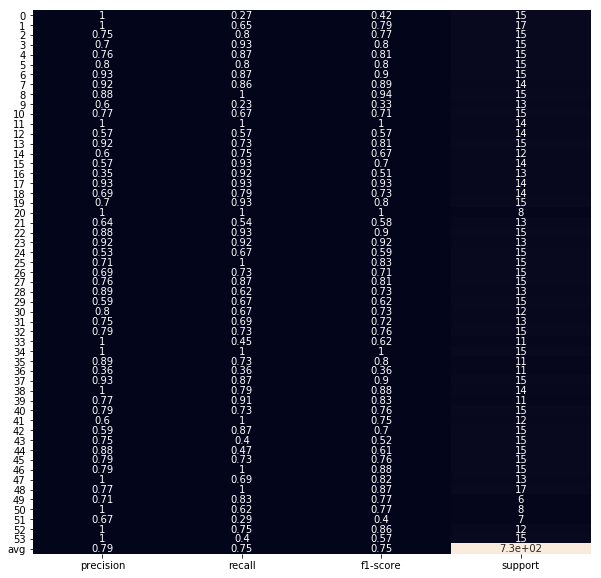

In [43]:
import seaborn as sns
import numpy as np
from sklearn.metrics import precision_recall_fscore_support
import matplotlib.pyplot as plt

y = np.random.randint(low=0, high=10, size=100)
y_p = np.random.randint(low=0, high=10, size=100)

def plot_classification_report(y_tru, y_prd, figsize=(10, 10), ax=None):

    plt.figure(figsize=figsize)

    xticks = ['precision', 'recall', 'f1-score', 'support']
    yticks = list(np.unique(y_tru))
    yticks += ['avg']

    rep = np.array(precision_recall_fscore_support(y_tru, y_prd)).T
    avg = np.mean(rep, axis=0)
    avg[-1] = np.sum(rep[:, -1])
    rep = np.insert(rep, rep.shape[0], avg, axis=0)

    sns.heatmap(rep,
                annot=True, 
                cbar=False, 
                xticklabels=xticks, 
                yticklabels=yticks,
                ax=ax)

plot_classification_report(validation_generator.classes,Y_pred_classes)

<Figure size 1440x1440 with 0 Axes>

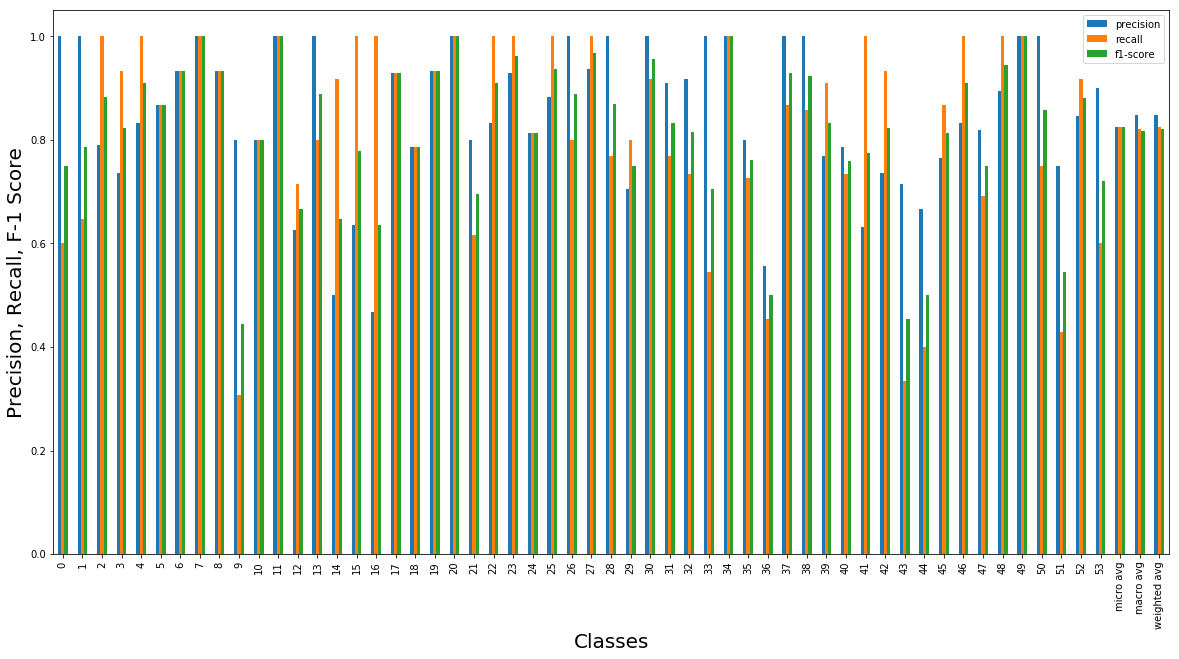

In [18]:
# Assuming that classification_report, y_test and predictions are in scope...
import pandas as pd

# Build a DataFrame from the classification_report output_dict.
report_data = []
for label, metrics in classification_report(validation_generator.classes, Y_pred_classes, output_dict=True).items():
    metrics['label'] = label
    report_data.append(metrics)

report_df = pd.DataFrame(
    report_data, 
    columns=['label', 'precision', 'recall', 'f1-score', 'support']
)


plt.figure(figsize = (20,20))

report_df.plot(y=['precision', 'recall', 'f1-score'], x='label', kind='bar', figsize=(20,10))
plt.xticks(rotation = 'vertical')
plt.xlabel('Classes', fontsize =20)
plt.ylabel('Precision, Recall, F-1 Score', fontsize = 20)
plt.show()


# Plot as a bar chart.
#sns.barplot(y='precision', x='label', data = report_df)
#report_df.plot(y=['precision', 'recall', 'f1-score'], x='label', kind='bar')

In [ ]:
import os

plant_classes = sorted(os.listdir(train_dir))
plant_classes.sort()
print("Number of Categories:", len(plant_classes))
lst = []
for i in range (0,54):
    lst.append(i)

class_dict = dict( zip(lst, plant_classes))
print(class_dict)

# Testing user images

In [18]:
import numpy as np
from keras.preprocessing import image
import keras



#model = tf.keras.models.load_model('Resnet50')
# predicting images
img = image.load_img("Random/GarlicMustard.jpg", target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
images = np.vstack([x])
classes = model.predict_classes(images, batch_size=32)
prob = model.predict_proba(images, batch_size= 32)
print(classes)
print(class_dict[int(classes)])

Using TensorFlow backend.


FileNotFoundError: [Errno 2] No such file or directory: 'Random/GarlicMustard.jpg'

In [19]:
validation_generator = validation_datagen.flow_from_directory(
                'Random', # Source directory for the validation images
                target_size=(image_size, image_size),
                batch_size=batch_size,
                shuffle = False, 
                class_mode='categorical')

np.set_printoptions(threshold=np.inf)
# Predict the values from the validation dataset
Y_pred = model.predict_generator(validation_generator, 23)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred, axis = 1)
for i in Y_pred_classes:
    print(str(i)+ ':' + str(class_dict[int(i)]))

Found 13 images belonging to 8 classes.
0:Alfalfa
0:Alfalfa
1:Asparagus
2:Blue Vervain
6:Chicory
16:Dandellion
16:Dandellion
16:Dandellion
16:Dandellion
24:Garlic Mustard
24:Garlic Mustard
46:Sunflower
46:Sunflower


In [33]:
import os

plant_classes = sorted(os.listdir('Random'))
plant_classes.sort()
print("Number of Categories:", len(plant_classes))
lst = []
for i in range (0,6):
    lst.append(i)

class_dict_new = dict( zip(lst, plant_classes))
print(class_dict_new)

Number of Categories: 8
{0: '.ipynb_checkpoints', 1: 'Alfalfa', 2: 'Asparagus', 3: 'Blue Vervain', 4: 'Chicory', 5: 'Dandellion'}


In [43]:
model = tf.keras.models.load_model('weights.best.hdf5')

In [13]:
# Unzipping Files
import zipfile
zip_ref = zipfile.ZipFile('train.zip', 'r')
zip_ref.extractall('train')
zip_ref.close()

import subprocess
subprocess.call(['7z', 'x', 'Test.zip', ''])

0